# Data Visualization Assignment

In [92]:
import pandas as pd
import os

# creating data dictionary for dataframes
dir_path = 'ddf--datapoints--population--by--country--age--gender--year'
country_codes = ['aus', 'can', 'chn', 'kor', 'usa']
data = {}

for filename in os.listdir(dir_path):
    if filename.endswith('.csv'):  
        country_code = filename.split('--country-')[1].split('--')[0]
        
        if country_code in country_codes:
            file_path = os.path.join(dir_path, filename)
            
            df = pd.read_csv(file_path)
            
            data[country_code] = df

## Part 1: Matplotlib
### Line plot of total population over time by country

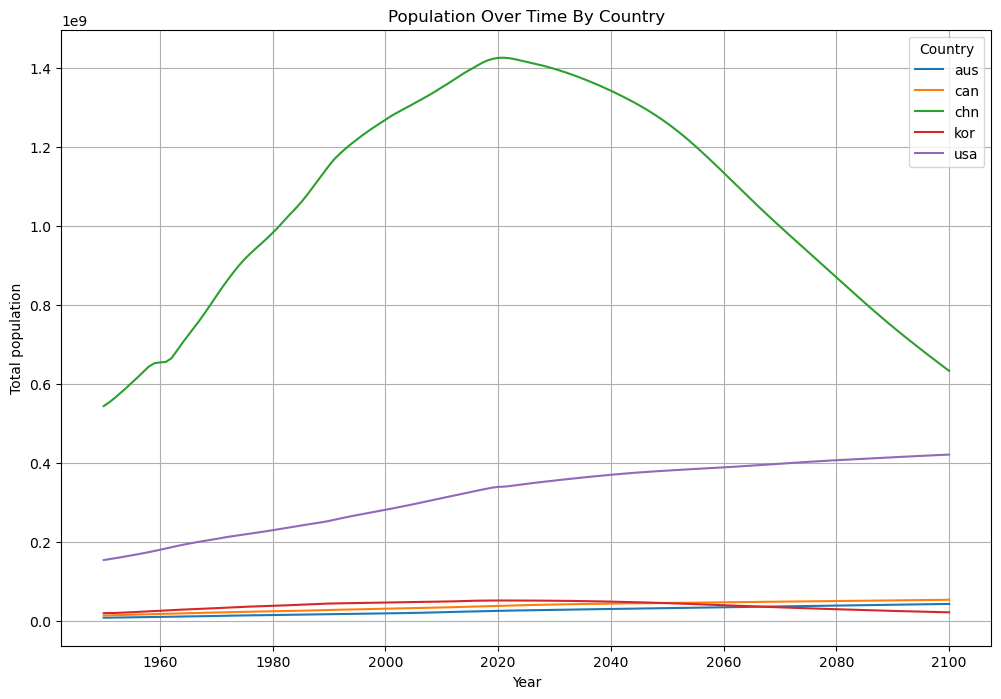

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# looping through each country in data dictionary
for country in country_codes:
    df = data[country]
    yearly_total = df.groupby('year')['population'].sum()

    plt.plot(yearly_total.index, yearly_total.values, label=country)

# adding labels and legend
plt.xlabel('Year')
plt.ylabel('Total population')
plt.title('Population Over Time By Country')
plt.legend(title='Country')
plt.grid(True)
plt.show()


### Stacked bar chart of age group distributions for 1950, 1985, and 2020 by country

In [89]:
total_population

year
1950     739917911
1985    1384378211
2020    1881199231
dtype: int64

/var/folders/gc/l7s63m3j6qv2whyx4wq356180000gn/T/ipykernel_29831/3462619502.py:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_position = age_dist.iloc[:i + 1, :].iloc[i].cumsum()[j] - (height / 2)  # centering annotation


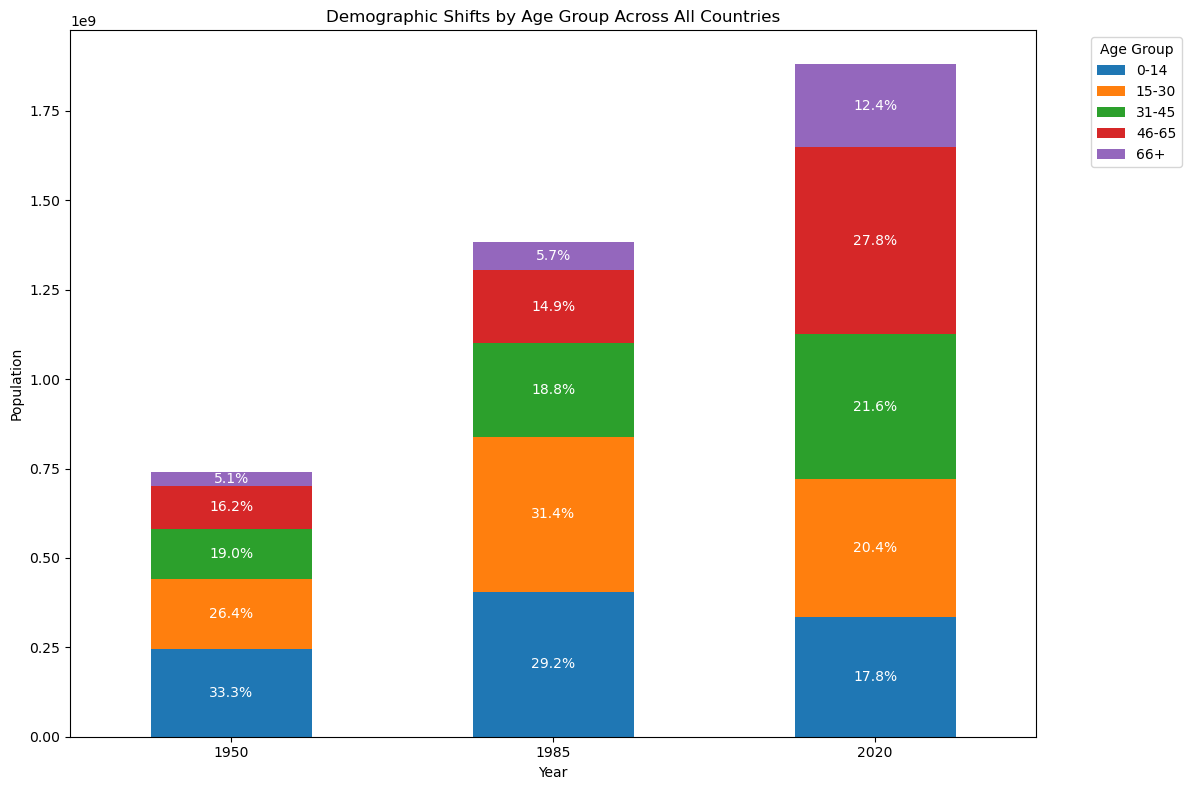

In [97]:
import numpy as np

# defining age groups and years 
age_groups = ['0-14', '15-30', '31-45', '46-65', '66+']
years = [1950, 1985, 2020]

# mapping age groups
age_mapping = {
    **{age: '0-14' for age in range(0, 15)},
    **{age: '15-30' for age in range(15, 31)},
    **{age: '31-45' for age in range(31, 46)},
    **{age: '46-65' for age in range(46, 66)},
    **{age: '66+' for age in range(66, 100)}
}

for key, country in data.items():
    data[key]['age_group'] = data[key]['age'].map(age_mapping)
    
# combining all countries in data dictionary
data_all = pd.concat(data.values())

# filtering for years 
filtered_data = data_all[data_all['year'].isin(years)]

# total pop. by age group for each year across all countries
age_dist = filtered_data.groupby(['year', 'age_group'])['population'].sum().unstack().reindex(columns=age_groups)

# plotting stacked bar chart
ax = age_dist.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.xticks(rotation=0)

# adding percentage annotations
total_population = age_dist.sum(axis=1)

for i in range(len(age_dist)):
    for j, age_group in enumerate(age_groups):
        # calculating height of each bar segment
        height = age_dist.iloc[i, j]
        if height > 0:  
            percentage = (height / total_population.iloc[i]) * 100  
            # calculating annotation y position  
            y_position = age_dist.iloc[:i + 1, :].iloc[i].cumsum()[j] - (height / 2)  # centering annotation
            ax.text(i, y_position, f'{percentage:.1f}%', ha='center', va='center', color='white')

# adding titles
plt.title('Demographic Shifts by Age Group Across All Countries')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend(title="Age Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout() 
plt.show()


## Part 2: Seaborn
### Heatmap of the population distribution across age groups and countries in a specific year

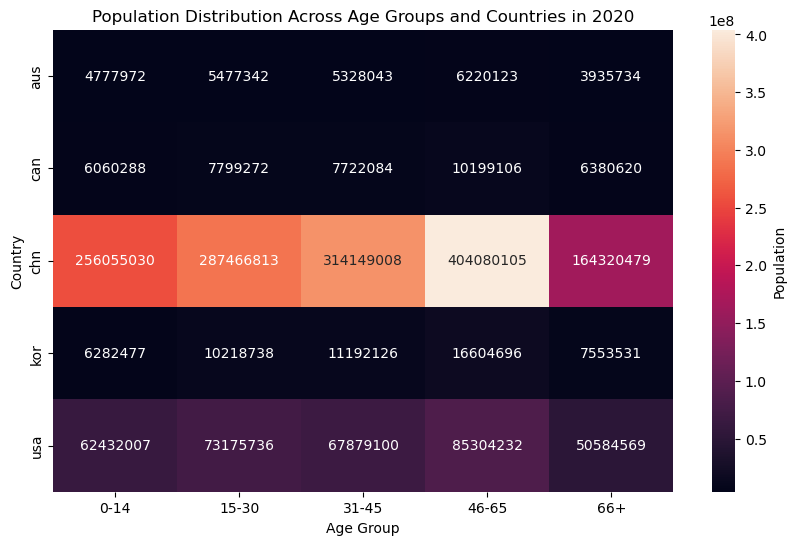

In [86]:
import seaborn as sns

age_groups = ['0-14', '15-30', '31-45', '46-65', '66+']

# Prepare data for heatmap
heatmap_data = pd.DataFrame(index=country_codes, columns=age_groups)

# Populate the heatmap data with total populations for each age group
for country_code in country_codes:
    df = data[country_code]
    yearly_data = df[df['year'] == 2020]
    age_totals = [yearly_data[yearly_data['age_group'] == group]['population'].sum() for group in age_groups]
    heatmap_data.loc[country_code] = age_totals

# Plot the heatmap
heatmap_data = heatmap_data.apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cbar_kws={'label': 'Population'})
plt.title('Population Distribution Across Age Groups and Countries in 2020')
plt.xlabel('Age Group')
plt.ylabel('Country')
plt.show()


In [68]:
heatmap_data

,0-14,15-30,31-45,46-65,66+
aus,4777972,5477342,5328043,6220123,3935734
can,6060288,7799272,7722084,10199106,6380620
chn,256055030,287466813,314149008,404080105,164320479
kor,6282477,10218738,11192126,16604696,7553531
usa,62432007,73175736,67879100,85304232,50584569
